# **Análise do risco de crédito - Teste Trade Technology**

In [1]:
#Leitura de bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
#Leitura do conjunto de dados
df = pd.read_csv('C:/Users/luann/Downloads/Teste Cientista/Teste Cientista/credit_risk_dataset.csv', sep=';')

## **Análises iniciais**

### Conhecimento do conjunto de dados


In [5]:
df.head()

,account_status,credit_duration,history_of_compliance,credit_purpose,credit_amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,other_installment_plans,type_of_housing,number_credits,job,people_liable,telephone,foreign_worker,level_of_education,entry_payment,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,...,3,1,1,3,2,NaN,no,3,52.45,1
1,1,9,4,0,2799,1,3,2,3,1,...,3,1,2,3,1,NaN,no,3,167.94,1
2,2,12,2,9,841,2,4,2,2,1,...,3,1,1,2,2,NaN,no,4,58.87,1
3,1,12,4,0,2122,1,3,3,3,1,...,3,1,2,2,1,NaN,yes,2,148.54,1
4,1,12,4,0,2171,1,3,4,3,1,...,1,2,2,2,2,NaN,yes,4,151.97,1


In [6]:
df.shape

(1200, 23)

Conjunto de dados possui 23 colunas, ou seja, 23 variáveis e 1200 observações.

### Informações das variáveis

Detalhando cada variável para um maior entendimento (de acordo com o README disponibilizado).

 0. account_status: situação da conta corrente do devedor no banco (categórica)

 1. credit_duration: duração do crédito em meses (quantitativa)  

 2. history_of_compliance: histórico de cumprimento de contratos de crédito anteriores ou concomitantes (categórica)  

 3. credit_purpose: finalidade do pedido de crédito (categórica)

 4. credit_amount: valor do crédito (quantitativo)  

 5. savings: poupança do devedor (categórica)                  

 6. employment_duration: duração do vínculo empregatício do devedor com o atual empregador (categórica - ordinal; quantitativo discretizado

 7. installment_rate: parcelas de crédito como percentual da renda disponível do devedor (categórica - ordinal; quantitativo discretizado)

 8. personal_status_sex: informações combinadas de sexo e estado civil (categórica)

 9. other_debtors: Existe outro devedor ou garantidor do crédito? (categórica)

 10. present_residence: tempo (em anos) que o devedor mora na residência atual (categórica - ordinal; quantitativo discretizado)

 11. property: usado o bem mais valioso do devedor (categórica)

 12. age: idade em anos (quantitativa)

 13. other_installment_plans: parcelamentos de outros fornecedores que não o banco credor (categórica)

 14. type_of_housing: tipo de habitação em que o devedor vive (categórica)

 15. number_credits: número de créditos incluindo o atual que o devedor tem (ou teve) neste banco (categórica)

 16. job: qualidade do trabalho do devedor (categórica - ordinal)

 17. people_liable: número de pessoas que dependem financeiramente do devedor (ou seja, têm direito a alimentos) (binário, quantitativo discretizado) (categórica)

 18. telephone: número do telefone (quantitativa)

 19. foreign_worker: O devedor é um trabalhador estrangeiro? (binária)

 20. level_of_education: nível de escolaridade (categórica)

 21. entry_payment: pagamento de entrada em DM (quantitativa)

 22. credit_risk: O contrato de crédito foi cumprido (bom - 1) ou não (ruim - 0) (binária)


Abaixo é feita a descrição em números para verificarmos se está condizente aos detalhes das variáveis.

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
account_status,1200.0,2.522500e+00,1.230483,1.0,1.000000e+00,2.00,4.000000e+00,4.00
credit_duration,1200.0,2.064250e+01,11.694742,4.0,1.200000e+01,18.00,2.400000e+01,72.00
history_of_compliance,1200.0,2.482500e+00,1.059385,0.0,2.000000e+00,2.00,4.000000e+00,4.00
credit_purpose,1200.0,2.733333e+00,2.647905,0.0,1.000000e+00,2.00,3.000000e+00,10.00
credit_amount,1200.0,3.239492e+03,2793.025577,250.0,1.359500e+03,2300.00,3.959000e+03,18424.00
savings,1200.0,2.061667e+00,1.525823,1.0,1.000000e+00,1.00,3.000000e+00,5.00
employment_duration,1200.0,3.310000e+00,1.192372,1.0,2.000000e+00,3.00,4.000000e+00,5.00
installment_rate,1200.0,2.914167e+00,1.120794,1.0,2.000000e+00,3.00,4.000000e+00,4.00
personal_status_sex,1200.0,2.650000e+00,0.694912,1.0,2.000000e+00,3.00,3.000000e+00,4.00
other_debtors,1200.0,1.125833e+00,0.445531,1.0,1.000000e+00,1.00,1.000000e+00,3.00


Observou-se que está tudo de acordo com as variáveis ora quantitativa ora qualitativa

## Pré-processamento dos dados

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   account_status           1200 non-null   int64  
 1   credit_duration          1200 non-null   int64  
 2   history_of_compliance    1200 non-null   int64  
 3   credit_purpose           1200 non-null   int64  
 4   credit_amount            1200 non-null   int64  
 5   savings                  1200 non-null   int64  
 6   employment_duration      1200 non-null   int64  
 7   installment_rate         1200 non-null   int64  
 8   personal_status_sex      1200 non-null   int64  
 9   other_debtors            1200 non-null   int64  
 10  present_residence        1200 non-null   int64  
 11  property                 1200 non-null   int64  
 12  age                      1200 non-null   int64  
 13  other_installment_plans  1200 non-null   int64  
 14  type_of_housing         

Acima verifica-se a forma e o tipo que os dados são apresentados.

### Identificando dados faltantes

 Agora será verificada se existem informações faltantes no conjunto de dados.

In [9]:
df.isnull().sum()

account_status               0
credit_duration              0
history_of_compliance        0
credit_purpose               0
credit_amount                0
savings                      0
employment_duration          0
installment_rate             0
personal_status_sex          0
other_debtors                0
present_residence            0
property                     0
age                          0
other_installment_plans      0
type_of_housing              0
number_credits               0
job                          0
people_liable                0
telephone                  758
foreign_worker               0
level_of_education           0
entry_payment                0
credit_risk                  0
dtype: int64

Observa-se que para a variável telefone existem 758 observações faltantes, como é uma variável que não se encaixa em categorias e nem é possível medí-la quantitativamente, vou optar por excluí-la do banco de dados visto que não irá nos acrescentar informações. Por hora, esta será a única variável excluída do conjunto de dados.

### Eliminando informações desnecessárias

In [10]:
df1 = df.drop(columns = ['telephone'])
df1.shape

(1200, 22)

In [11]:
df1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
account_status,1200.0,2.522500,1.230483,1.0,1.000,2.00,4.0000,4.00
credit_duration,1200.0,20.642500,11.694742,4.0,12.000,18.00,24.0000,72.00
history_of_compliance,1200.0,2.482500,1.059385,0.0,2.000,2.00,4.0000,4.00
credit_purpose,1200.0,2.733333,2.647905,0.0,1.000,2.00,3.0000,10.00
credit_amount,1200.0,3239.492500,2793.025577,250.0,1359.500,2300.00,3959.0000,18424.00
savings,1200.0,2.061667,1.525823,1.0,1.000,1.00,3.0000,5.00
employment_duration,1200.0,3.310000,1.192372,1.0,2.000,3.00,4.0000,5.00
installment_rate,1200.0,2.914167,1.120794,1.0,2.000,3.00,4.0000,4.00
personal_status_sex,1200.0,2.650000,0.694912,1.0,2.000,3.00,3.0000,4.00
other_debtors,1200.0,1.125833,0.445531,1.0,1.000,1.00,1.0000,3.00


Agora o banco de dados parece está ok para fazermos algumas modificações necessárias nas variáveis. Mas antes vou separar a nossa variável de interesse (resposta, dependente) que é a credit_risk.

In [12]:
y = df1['credit_risk']
X = df1
X = df1.drop('credit_risk',axis = 1)

In [13]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: credit_risk, dtype: int64

In [14]:
X.head()

,account_status,credit_duration,history_of_compliance,credit_purpose,credit_amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,type_of_housing,number_credits,job,people_liable,foreign_worker,level_of_education,entry_payment
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,no,3,52.45
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,no,3,167.94
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,no,4,58.87
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,yes,2,148.54
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,yes,4,151.97


Agora temos y como nossa variável resposta/dependente e X com nossas variáveis independentes.

Para utilizarmos modelos de predição etc, é necessário realizar algumas modificações para deixarmos os valores das variáveis, tanto quantitativas quanto qualitativas, coerentes.

### Separando as variáveis de diferentes tipos (quantitativas e qualitativas)

Variáveis quantitativas/contínuas

In [15]:
x_cont = ['credit_duration','credit_amount','age','entry_payment']

Variáveis qualitativas/categóricas - colocando no formato dummies (elas já estão de certa forma, mais para confirmação/certeza)

In [16]:
x_categ = list(set(X) - set(x_cont))
x_dummies = X[x_categ]
x_dummies

,job,account_status,property,type_of_housing,present_residence,number_credits,foreign_worker,savings,employment_duration,people_liable,personal_status_sex,installment_rate,other_debtors,other_installment_plans,credit_purpose,level_of_education,history_of_compliance
0,3,1,2,1,4,1,no,1,2,2,2,4,1,3,2,3,4
1,3,1,1,1,2,2,no,1,3,1,3,2,1,3,0,3,4
2,2,2,1,1,4,1,no,2,4,2,2,2,1,3,9,4,2
3,2,1,1,1,2,2,yes,1,3,1,3,3,1,3,0,2,4
4,2,1,2,2,4,2,yes,1,3,2,3,4,1,1,0,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,2,3,1,2,2,1,no,1,3,2,3,3,1,2,2,2,3
1196,3,2,3,2,1,1,no,1,3,2,3,1,1,3,2,2,3
1197,2,2,1,2,4,1,no,1,3,2,3,3,1,2,7,3,1
1198,2,2,2,2,3,1,no,1,5,2,3,4,1,3,4,2,2


### Tratamento das variáveis categóricas

A variável foreign_worker possui dois valores: 'no' e 'yes'. Vou transformar esses valores em 0 e 1, respectivamente, utilizando o LabelEncoder().

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['foreign_worker'] = le.fit_transform(X['foreign_worker']) 
X.head()

,account_status,credit_duration,history_of_compliance,credit_purpose,credit_amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,type_of_housing,number_credits,job,people_liable,foreign_worker,level_of_education,entry_payment
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,0,3,52.45
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,0,3,167.94
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,0,4,58.87
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,2,148.54
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,4,151.97


Para as variáveis com mais de duas categorias, utilizo a função get_dummies(), ela transforma cada categoria em uma variável nova binária.

In [18]:
x_final = pd.get_dummies (data = X, columns = ['account_status','history_of_compliance', 'credit_purpose', 'savings',
                                               'employment_duration', 'installment_rate', 'personal_status_sex',
                                               'other_debtors', 'present_residence', 'property', 'other_installment_plans', 'type_of_housing',
                                               'number_credits', 'job', 'people_liable', 'level_of_education'] )
x_final

,credit_duration,credit_amount,age,foreign_worker,entry_payment,account_status_1,account_status_2,account_status_3,account_status_4,history_of_compliance_0,...,job_1,job_2,job_3,job_4,people_liable_1,people_liable_2,level_of_education_1,level_of_education_2,level_of_education_3,level_of_education_4
0,18,1049,21,0,52.45,1,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
1,9,2799,36,0,167.94,1,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
2,12,841,23,0,58.87,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
3,12,2122,39,1,148.54,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
4,12,2171,38,1,151.97,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,12,1364,32,0,81.84,0,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
1196,20,6376,38,0,446.32,0,1,0,0,0,...,0,0,1,0,0,1,0,1,0,0
1197,11,1040,33,0,62.40,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
1198,16,1305,35,0,65.25,0,1,0,0,0,...,0,1,0,0,0,1,0,1,0,0


O que nos resulta em um dataframe com 74 colunas.

### Tratamento das variáveis numéricas

Observa-se que as variáveis quantitativas estão em diferentes escalas e na hora de rodar nosso modelo isso pode causar problemas/interpretações equivocadas. Vou padronizar as variáveis em uma escala entre 0 e 1 pelo método MiniMaxScaler().

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_final[x_cont] = scaler.fit_transform(x_final[x_cont])
x_final[x_cont]


,credit_duration,credit_amount,age,entry_payment
0,0.205882,0.043964,0.035714,0.031280
1,0.073529,0.140255,0.303571,0.121706
2,0.117647,0.032519,0.071429,0.036307
3,0.117647,0.103004,0.357143,0.106516
4,0.117647,0.105700,0.339286,0.109202
...,...,...,...,...
1195,0.117647,0.061296,0.232143,0.054291
1196,0.235294,0.337075,0.339286,0.339670
1197,0.102941,0.043469,0.250000,0.039070
1198,0.176471,0.058050,0.285714,0.041302


Tranformaçõe e análises finalizadas, agora vou começar o modelo de predição.

## Modelo de predição

A seguir está nosso conjunto de dados atualizado, com as devidas transformações e limpo.

In [20]:
x_final.head()

,credit_duration,credit_amount,age,foreign_worker,entry_payment,account_status_1,account_status_2,account_status_3,account_status_4,history_of_compliance_0,...,job_1,job_2,job_3,job_4,people_liable_1,people_liable_2,level_of_education_1,level_of_education_2,level_of_education_3,level_of_education_4
0,0.205882,0.043964,0.035714,0,0.031280,1,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
1,0.073529,0.140255,0.303571,0,0.121706,1,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
2,0.117647,0.032519,0.071429,0,0.036307,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
3,0.117647,0.103004,0.357143,1,0.106516,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
4,0.117647,0.105700,0.339286,1,0.109202,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1


In [21]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: credit_risk, dtype: int64

In [22]:
y.value_counts()

1    840
0    360
Name: credit_risk, dtype: int64

Para realização do modelo de predição, é necessário separar os dados em teste e treino. Vou separar 70% dos dados para treino e os outros 20% para teste. Também vale ressaltar que os dados são desbalanceados, ou seja, possuímos mais dados com credit_risk = 1 que representa 70% dos dados, do que credit_risk = 0 que representa os outros 30%.

In [23]:
from sklearn.model_selection import train_test_split 
x_treino, x_teste, y_treino, y_teste  = train_test_split(x_final, y, test_size = 0.30, random_state = 1)

### Random Forest

Inicialmente vou utilizar o modelo Random Forest. Os parâmetros n_estimators e random_state significam quantidade de árvores que desejo construir antes de obter o máximo ou médias das previsões (quanto maior o número, melhor o desempenho) e este é um valor para facilitar a replicação de uma solução, respectivamente.

In [24]:
from sklearn.ensemble import RandomForestClassifier 
rf = RandomForestClassifier (n_estimators = 1100, random_state = 1)  
rf.fit (x_treino, y_treino); 
y_rf = rf.predict(x_teste)

In [25]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_teste, y_rf))

              precision    recall  f1-score   support

           0       0.82      0.31      0.45       117
           1       0.74      0.97      0.84       243

    accuracy                           0.75       360
   macro avg       0.78      0.64      0.64       360
weighted avg       0.77      0.75      0.71       360



In [26]:
print (pd.crosstab(y_teste, y_rf, rownames = ['Real'], colnames = ['Predito'], margins = True))

Predito   0    1  All
Real                 
0        36   81  117
1         8  235  243
All      44  316  360


Observa-se uma acurácia de 75% do modelo no geral.

In [27]:
#Analisando a importância de cada variável
rf.feature_importances_
feature_importances = pd.DataFrame(rf.feature_importances_, index = x_treino.columns, columns=['importance']).sort_values('importance', ascending = False)
feature_importances

,importance
credit_amount,0.076870
entry_payment,0.072179
credit_duration,0.068422
age,0.062528
account_status_4,0.049784
...,...
number_credits_3,0.002023
job_1,0.001765
credit_purpose_10,0.001135
credit_purpose_8,0.000540


Observa-se para o credit_risk = 0 (ruim) que a precisão não é tão ruim, 82% que significa que o modelo está tendo o cuidado de evitar rotular coisas como 0 que não são 0. Por outro lado, o recall está bem baixo, 31%, que significa que o classificador está deixando de considerar muitos '0-ruins' porque está sendo muito cuidadoso. A % do score f1 reflete o desequilíbrio, com o valor de 45%.

Observa-se também a importância das variáveis, sendo as mais importantes 'credit_amount, 'entry_payment', 'credit_duration' e 'age'.

### XGBoost

Agora vou considerar o modelo XGBoost que combina modelos de árvores de decisão em combinação com o Gradient Boosting. E este modelo não sofre tanta influência de dados desbalanceados, vamos verificar.

In [30]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [34]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
# ajuste do modelo nos dados de treino
xgb = XGBClassifier(learning_rate =0.1,
 n_estimators=1100,
 max_depth=6,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1.0,
 seed=27)
xgb.fit(x_treino, y_treino)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=1100,
              n_jobs=4, nthread=4, num_parallel_tree=1, predictor='auto',
              random_state=27, reg_alpha=0, ...)

In [35]:
preditos_xgb = xgb.predict(x_teste)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_teste, preditos_xgb))

              precision    recall  f1-score   support

           0       0.68      0.44      0.54       117
           1       0.77      0.90      0.83       243

    accuracy                           0.75       360
   macro avg       0.73      0.67      0.68       360
weighted avg       0.74      0.75      0.74       360



<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

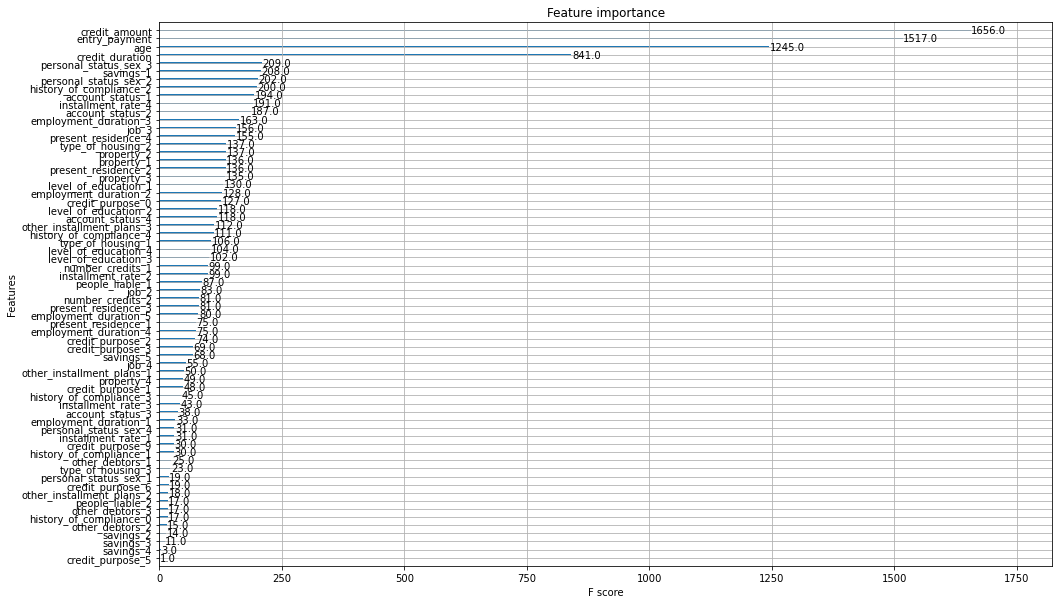

In [36]:
import matplotlib.pyplot as plt
from xgboost import plot_importance
fig, ax = plt.subplots(figsize=(16,10))
plot_importance(xgb, ax=ax)

A importância das variáveis comporta-se da mesma maneira que no modelo Random Forest, assim como, a acurácia, que continuou em 75% de forma geral. Olhando individualmente para o credit_risk = 0 que foi o que observamos com o desempenho pior no modelo anterior, ele continua com um % ruim porém melhorou neste modelo do XGBoost com o f1-score de 54%.

Portanto, em relação aos dois modelos utilizados, opta-se pelo XGBoost por ter trazido resultados mais equilibrados 'individualmente' mas ressalta-se que não foram bons. Porém, cabe testar vários outros modelos para que tenha-se uma melhor acurácia, por exemplo, o método Ensemble que combina modelos como o RandomForest e o XGBoost.